In [ ]:
# 1. Open Google Colab - https://colab.research.google.com/
# 2. Upload this file 
# 3. Upload all the data given with code
# 4. Click on Run All to see the results

#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from matplotlib import pyplot
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import math 
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%reload_ext autoreload
%autoreload 2 

In [ ]:
#Loading Dataset 2022 Main Table in python
missing_values = ["Unknown", "No reply", "NaN"]
df = pd.read_csv("2022_Guardian_Table.csv", na_values = missing_values)
df.index = np.arange(1, len(df) + 1)
df.head()

,Guardian score/100,Satisfied with course,Satisfied with teaching,Satisfied with feedback,Student to staff ratio,Spend per student/10,Average entry tariff,Value added score/10,Career after 15 months,Continuation
1,100.0,NaN,NaN,NaN,10.1,10.0,198,6.3,93,99.0
2,97.8,NaN,NaN,NaN,11.4,9.9,206,6.7,93,99.0
3,96.8,93.1,92.3,79.6,11.1,7.3,207,5.6,84,97.0
4,91.6,80.1,83.1,70.2,12.4,8.7,175,6.9,93,97.0
5,86.5,83.9,84.8,69.5,13.5,6.5,182,6.7,89,97.0


In [ ]:
#Checking columns which have null values
df.isnull().sum()

Guardian score/100         0
Satisfied with course      2
Satisfied with teaching    2
Satisfied with feedback    2
Student to staff ratio     0
Spend per student/10       2
Average entry tariff       0
Value added score/10       0
Career after 15 months     0
Continuation               1
dtype: int64

In [ ]:
#Data Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# fit on the dataset4
y=df['Guardian score/100']
y.index = np.arange(1, len(y) + 1)
imputer.fit(df.drop('Guardian score/100', axis=1))
X=imputer.transform(df.drop('Guardian score/100', axis=1))
X = pd.DataFrame(imputer.transform(df.drop('Guardian score/100', axis=1)),columns=['Satisfied with course','Satisfied with teaching','Satisfied with feedback','Student to staff ratio','Spend per student/10','Average entry tariff','Value added score/10','Career after 15 months','Continuation'])
X.index = np.arange(1, len(X) + 1)

In [ ]:
#Checking columns which have null values again to ensure no missing values left in data
X.isnull().sum()

Satisfied with course      0
Satisfied with teaching    0
Satisfied with feedback    0
Student to staff ratio     0
Spend per student/10       0
Average entry tariff       0
Value added score/10       0
Career after 15 months     0
Continuation               0
dtype: int64

In [ ]:
#Code to find outliers
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   sum=outliers.count()
   return sum

#Finding outliers
print(find_outliers_IQR(X))

#Code to impute outliers
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,
       df.mean(),
       np.where(
           df < lower,
           df.mean(),
           df
           )
       )
   return df

#imputing outliers with mean
X['Satisfied with course'] = impute_outliers_IQR(X['Satisfied with course'])
X['Satisfied with teaching'] = impute_outliers_IQR(X['Satisfied with teaching'])
X['Satisfied with feedback'] = impute_outliers_IQR(X['Satisfied with feedback'])
X['Student to staff ratio'] = impute_outliers_IQR(X['Student to staff ratio'])
X['Spend per student/10'] = impute_outliers_IQR(X['Spend per student/10'])
X['Average entry tariff'] = impute_outliers_IQR(X['Average entry tariff'])
X['Value added score/10'] = impute_outliers_IQR(X['Value added score/10'])


Satisfied with course      3
Satisfied with teaching    4
Satisfied with feedback    1
Student to staff ratio     4
Spend per student/10       2
Average entry tariff       3
Value added score/10       1
Career after 15 months     0
Continuation               0
dtype: int64


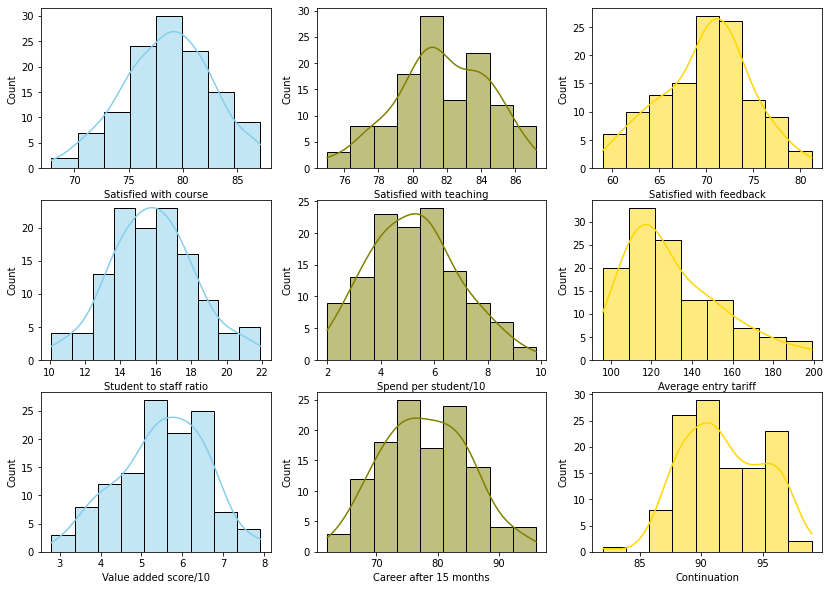

In [ ]:
#Data Spread after outliers are removed for main table 2022
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
sns.histplot(data=X, x="Satisfied with course", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=X, x="Satisfied with teaching", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X, x="Satisfied with feedback", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=X, x="Student to staff ratio", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=X, x="Spend per student/10", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=X, x="Average entry tariff", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=X, x="Value added score/10", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=X, x="Career after 15 months", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=X, x="Continuation", kde=True, color="gold", ax=axs[2, 2])
plt.show()

In [ ]:
# Assigning independent features name to names list
names=['Satisfied with course','Satisfied with teaching','Satisfied with feedback','Student to staff ratio','Spend per student/10','Average entry tariff','Value added score/10','Career after 15 months','Continuation']

In [ ]:
# define standard scaler
scaler = StandardScaler()
# transform data
df = scaler.fit_transform(X)
X = pd.DataFrame(df, columns=names)
X.head()
X_22=X
y_22=y

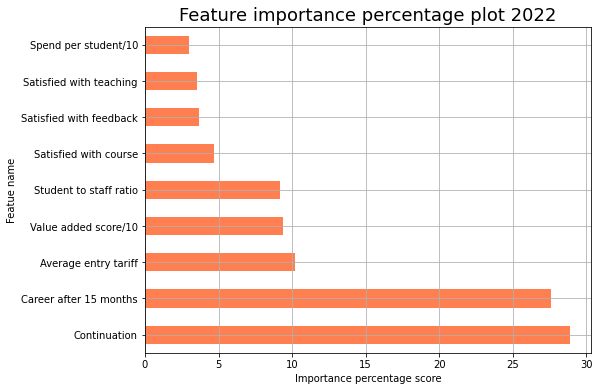

Satisfied with course       4.706088
Satisfied with teaching     3.527372
Satisfied with feedback     3.643033
Student to staff ratio      9.188474
Spend per student/10        2.963612
Average entry tariff       10.166074
Value added score/10        9.355448
Career after 15 months     27.561796
Continuation               28.888102
dtype: float64


In [ ]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X.iloc[2:], y.iloc[2:])
plt.figure(figsize=(8,6))
#Calculating feature importance score with RandomForestRegressor()
imprtancepercent=(model.feature_importances_ / sum(model.feature_importances_)) * 100
feat_importances = pd.Series(imprtancepercent, index=X.iloc[2:].columns)
feat_importances.nlargest(15).plot(kind='barh',color='coral')
plt.title("Feature importance percentage plot 2022",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()
print(feat_importances)

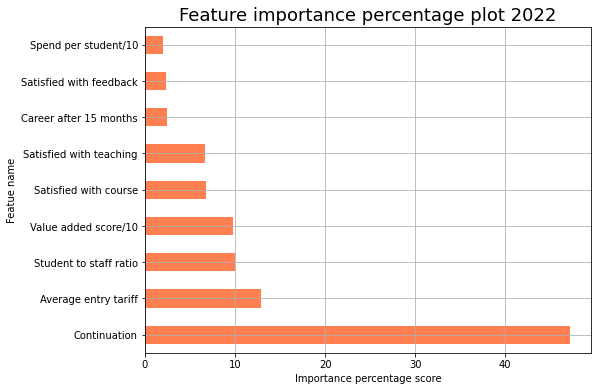

Satisfied with course       6.765920
Satisfied with teaching     6.664269
Satisfied with feedback     2.353510
Student to staff ratio      9.967265
Spend per student/10        1.955303
Average entry tariff       12.894093
Value added score/10        9.728696
Career after 15 months      2.469310
Continuation               47.201633
dtype: float64


In [ ]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X.iloc[2:], y.iloc[2:])
plt.figure(figsize=(8,6)) 
#Calculating feature importance score with DecisionTreeRegressor()
imprtancepercent=(model.feature_importances_ / sum(model.feature_importances_)) * 100
feat_importances = pd.Series(imprtancepercent, index=X.iloc[2:].columns)
feat_importances.nlargest(15).plot(kind='barh',color='coral')
plt.title("Feature importance percentage plot 2022",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()
print(feat_importances)

[17:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


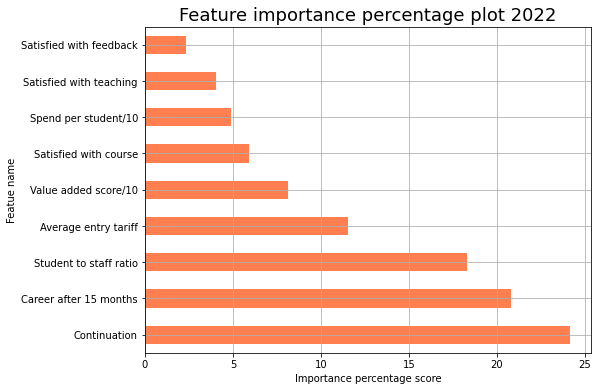

Satisfied with course       5.900579
Satisfied with teaching     4.021733
Satisfied with feedback     2.312785
Student to staff ratio     18.282797
Spend per student/10        4.901817
Average entry tariff       11.514863
Value added score/10        8.119749
Career after 15 months     20.779673
Continuation               24.166006
dtype: float32


<Figure size 432x288 with 0 Axes>

In [ ]:
# Define the model
model = XGBRegressor()
# Fit the model
model.fit(X.iloc[2:], y.iloc[2:])
plt.figure(figsize=(8,6)) 
# Calculating feature importance with XGBRegressor()
imprtancepercent=(model.feature_importances_ / sum(model.feature_importances_)) * 100
feat_importances = pd.Series(imprtancepercent, index=X.iloc[2:].columns)
feat_importances.nlargest(15).plot(kind='barh',color='coral')
plt.title("Feature importance percentage plot 2022",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()
fig_imp=plt.savefig('books_read.png')
print(feat_importances)

### **2021 League Table**

In [ ]:
# Loading 2021 Main Table datset
missing_values = ["Unknown", "No reply", "NaN"]
df_2021 = pd.read_csv("2021_Guardian_Table.csv", na_values = missing_values)
# Checking columns which have null values
df_2021.isnull().sum()

Guardian score/100         0
Satisfied with course      2
Satisfied with teaching    2
Satisfied with feedback    2
Student to staff ratio     0
Spend per student/10       0
Average entry tariff       0
Value added score/10       0
Career after 15 months     0
Continuation               1
dtype: int64

In [ ]:
#Data Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y_21=df_2021['Guardian score/100']
y_21.index = np.arange(1, len(y_21) + 1)
imputer.fit(df_2021.drop('Guardian score/100', axis=1))
X_21=imputer.transform(df_2021.drop('Guardian score/100', axis=1))
X_21 = pd.DataFrame(imputer.transform(df_2021.drop('Guardian score/100', axis=1)),columns=['Satisfied with course','Satisfied with teaching','Satisfied with feedback','Student to staff ratio','Spend per student/10','Average entry tariff','Value added score/10','Career after 15 months','Continuation'])
X_21.index = np.arange(1, len(X_21) + 1)
#Finding Outliers
print(find_outliers_IQR(X_21))
#Imputing Outliers
X_21['Satisfied with course'] = impute_outliers_IQR(X_21['Satisfied with course'])
X_21['Satisfied with teaching'] = impute_outliers_IQR(X_21['Satisfied with teaching'])
X_21['Satisfied with feedback'] = impute_outliers_IQR(X_21['Satisfied with feedback'])
X_21['Student to staff ratio'] = impute_outliers_IQR(X_21['Student to staff ratio'])
X_21['Spend per student/10'] = impute_outliers_IQR(X_21['Spend per student/10'])
X_21['Average entry tariff'] = impute_outliers_IQR(X_21['Average entry tariff'])
X_21['Value added score/10'] = impute_outliers_IQR(X_21['Value added score/10'])
X_21['Continuation'] = impute_outliers_IQR(X_21['Continuation'])

Satisfied with course      3
Satisfied with teaching    2
Satisfied with feedback    3
Student to staff ratio     1
Spend per student/10       3
Average entry tariff       2
Value added score/10       1
Career after 15 months     0
Continuation               1
dtype: int64


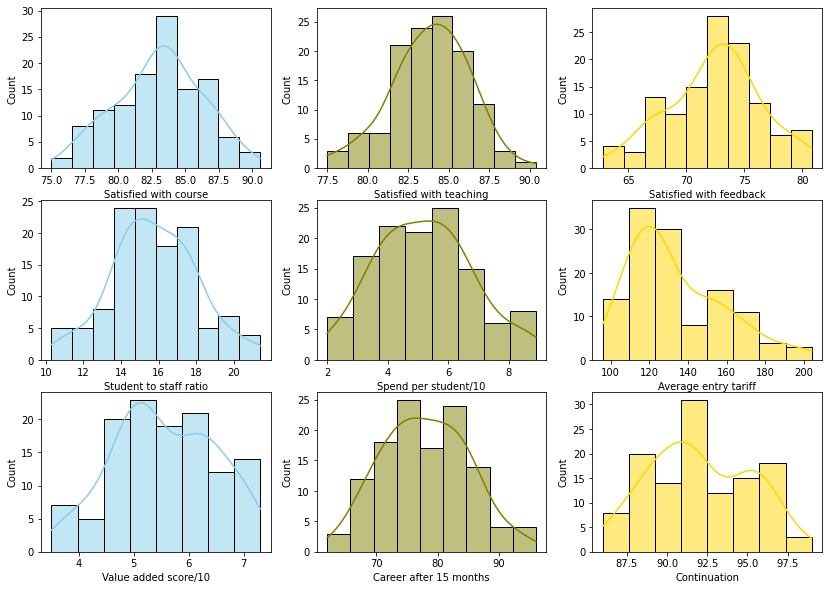

In [ ]:
# Data Spread after outliers are removed for main table 2021
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
sns.histplot(data=X_21, x="Satisfied with course", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=X_21, x="Satisfied with teaching", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X_21, x="Satisfied with feedback", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=X_21, x="Student to staff ratio", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=X_21, x="Spend per student/10", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=X_21, x="Average entry tariff", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=X_21, x="Value added score/10", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=X_21, x="Career after 15 months", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=X_21, x="Continuation", kde=True, color="gold", ax=axs[2, 2])
plt.show()


In [ ]:
# transform data
df = scaler.fit_transform(X_21)
X_21 = pd.DataFrame(df, columns=names)

[17:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


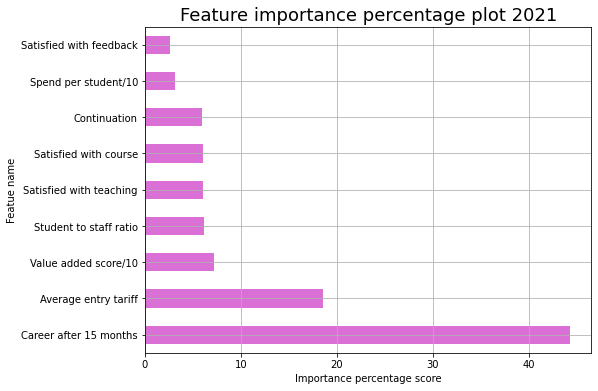

Satisfied with course       6.037528
Satisfied with teaching     6.090330
Satisfied with feedback     2.576537
Student to staff ratio      6.177681
Spend per student/10        3.102491
Average entry tariff       18.548153
Value added score/10        7.213476
Career after 15 months     44.316051
Continuation                5.937756
dtype: float32


In [ ]:
# define the model
model21 = XGBRegressor()
# fit the model
model21.fit(X_21.iloc[2:], y_21.iloc[2:])
plt.figure(figsize=(8,6)) 
# Calculating feature importance with XGBRegressor()
imprtancepercent_21=(model21.feature_importances_ / sum(model21.feature_importances_)) * 100
feat_importances_name = pd.Series(model.feature_importances_, index=X_21.iloc[2:].columns)
feat_importances_21 = pd.Series(imprtancepercent_21, index=X_21.iloc[2:].columns)
feat_importances_21.nlargest(15).plot(kind='barh',color='orchid')
plt.title("Feature importance percentage plot 2021",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()
print(feat_importances_21)

### **2023 League Table**

In [ ]:
# Loading 2023 Main Table datset
missing_values = ["Unknown", "No reply", "NaN"]
df_2023 = pd.read_csv("2023_Guardian_Table.csv", na_values = missing_values)
#Checking columns which have null values
df_2023.isnull().sum()

Guardian score/100         0
Satisfied with course      2
Satisfied with teaching    2
Satisfied with feedback    2
Student to staff ratio     0
Spend per student/10       2
Average entry tariff       0
Value added score/10       0
Career after 15 months     0
Continuation               2
dtype: int64

In [ ]:
# Data Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y_23=df_2023['Guardian score/100']
y_23.index = np.arange(1, len(y_23) + 1)
imputer.fit(df_2023.drop('Guardian score/100', axis=1))
X_23=imputer.transform(df_2023.drop('Guardian score/100', axis=1))
X_23 = pd.DataFrame(imputer.transform(df_2023.drop('Guardian score/100', axis=1)),columns=['Satisfied with course','Satisfied with teaching','Satisfied with feedback','Student to staff ratio','Spend per student/10','Average entry tariff','Value added score/10','Career after 15 months','Continuation'])
X_23.index = np.arange(1, len(X_23) + 1)
# Finding Outliers
print(find_outliers_IQR(X_23))
# Imputing Outliers
X_23['Satisfied with course'] = impute_outliers_IQR(X_23['Satisfied with course'])
X_23['Satisfied with teaching'] = impute_outliers_IQR(X_23['Satisfied with teaching'])
X_23['Satisfied with feedback'] = impute_outliers_IQR(X_23['Satisfied with feedback'])
X_23['Student to staff ratio'] = impute_outliers_IQR(X_23['Student to staff ratio'])
X_23['Spend per student/10'] = impute_outliers_IQR(X_23['Spend per student/10'])
X_23['Average entry tariff'] = impute_outliers_IQR(X_23['Average entry tariff'])
X_23['Value added score/10'] = impute_outliers_IQR(X_23['Value added score/10'])
X_23['Continuation'] = impute_outliers_IQR(X_23['Continuation'])

Satisfied with course      3
Satisfied with teaching    3
Satisfied with feedback    0
Student to staff ratio     5
Spend per student/10       0
Average entry tariff       6
Value added score/10       0
Career after 15 months     0
Continuation               0
dtype: int64


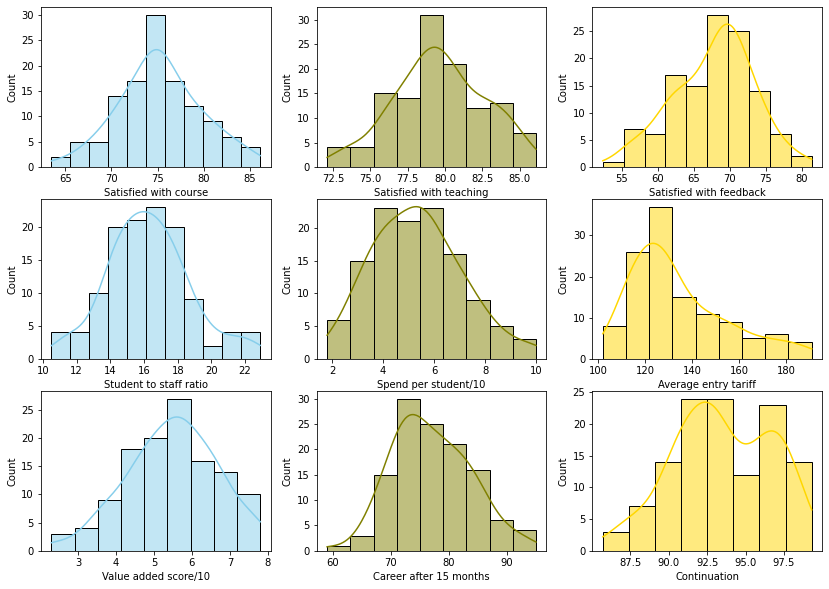

In [ ]:
# Data Spread after outliers are removed for main table 2023
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
sns.histplot(data=X_23, x="Satisfied with course", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=X_23, x="Satisfied with teaching", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X_23, x="Satisfied with feedback", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=X_23, x="Student to staff ratio", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=X_23, x="Spend per student/10", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=X_23, x="Average entry tariff", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=X_23, x="Value added score/10", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=X_23, x="Career after 15 months", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=X_23, x="Continuation", kde=True, color="gold", ax=axs[2, 2])
plt.show()

In [ ]:
# Transform data
df = scaler.fit_transform(X_23)
X_23 = pd.DataFrame(df, columns=names)
X_23.head()

,Satisfied with course,Satisfied with teaching,Satisfied with feedback,Student to staff ratio,Spend per student/10,Average entry tariff,Value added score/10,Career after 15 months,Continuation
0,-0.030479,-0.019890,1.805880e+00,-1.830608,0.939888,0.157509,0.941369,1.651320,1.595975
1,-0.030479,-0.019890,-2.556855e-15,-2.359983,2.648340,0.157509,0.262854,2.249105,1.754348
2,-0.030479,-0.019890,-2.556855e-15,-1.912050,2.591391,0.157509,0.093226,2.249105,1.849372
3,0.789324,0.779652,-1.013010e-01,-1.179069,1.908011,2.682067,1.619884,2.249105,1.437602
4,1.747070,2.038981,-1.288791e+00,-1.871329,2.078856,0.157509,-0.330846,2.697444,1.500951


[17:27:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


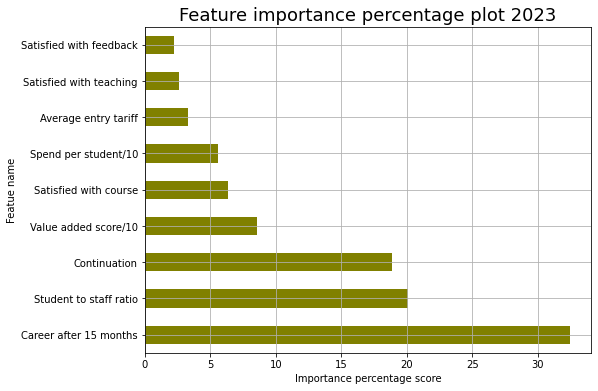

Satisfied with course       6.339762
Satisfied with teaching     2.566828
Satisfied with feedback     2.242617
Student to staff ratio     20.094902
Spend per student/10        5.562451
Average entry tariff        3.265642
Value added score/10        8.597725
Career after 15 months     32.482327
Continuation               18.847740
dtype: float32


In [ ]:
# Define the model
model23 = XGBRegressor()
# Fit the model
model23.fit(X_23.iloc[2:], y_23.iloc[2:])
plt.figure(figsize=(8,6)) 
# Calculating feature importance with XGBRegressor()
imprtancepercent_23=(model23.feature_importances_ / sum(model23.feature_importances_)) * 100
feat_importances_name = pd.Series(model.feature_importances_, index=X_23.iloc[2:].columns)
feat_importances_23 = pd.Series(imprtancepercent_23, index=X_23.iloc[2:].columns)
feat_importances_23.nlargest(15).plot(kind='barh',color='olive')
plt.title("Feature importance percentage plot 2023",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()
feat_importances_name = pd.Series(model.feature_importances_, index=X_23.iloc[2:].columns)
print(feat_importances_23)

## **2023 The Guardian Math**

In [ ]:
# Loading 2023 Math Table datset
missing_values = ["Unknown", "No reply", "NaN"]
df_2023M = pd.read_csv("2023_math_theguardian.csv", na_values = missing_values)
# Checking columns which have null values
df_2023M.isnull().sum()

Guardian score/100         0
Satisfied with course      2
Satisfied with teaching    2
Satisfied with feedback    2
Student to staff ratio     3
Spend per student/10       0
Average entry tariff       2
Value added score/10       2
Career after 15 months     6
Contin-uation              0
dtype: int64

In [ ]:
# Data Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit on the dataset
y_23M=df_2023M['Guardian score/100']
y_23M.index = np.arange(1, len(y_23M) + 1)
imputer.fit(df_2023M.drop('Guardian score/100', axis=1))
X_23M=imputer.transform(df_2023M.drop('Guardian score/100', axis=1))
X_23M = pd.DataFrame(imputer.transform(df_2023M.drop('Guardian score/100', axis=1)),columns=['Satisfied with course','Satisfied with teaching','Satisfied with feedback','Student to staff ratio','Spend per student/10','Average entry tariff','Value added score/10','Career after 15 months','Continuation'])
X_23M.index = np.arange(1, len(X_23M) + 1)
#Finding Outliers
print(find_outliers_IQR(X_23M))
#Imputing Outliers
X_23M['Satisfied with course'] = impute_outliers_IQR(X_23M['Satisfied with course'])
X_23M['Satisfied with teaching'] = impute_outliers_IQR(X_23M['Satisfied with teaching'])
X_23M['Satisfied with feedback'] = impute_outliers_IQR(X_23M['Satisfied with feedback'])
X_23M['Student to staff ratio'] = impute_outliers_IQR(X_23M['Student to staff ratio'])
X_23M['Spend per student/10'] = impute_outliers_IQR(X_23M['Spend per student/10'])
X_23M['Average entry tariff'] = impute_outliers_IQR(X_23M['Average entry tariff'])
X_23M['Value added score/10'] = impute_outliers_IQR(X_23M['Value added score/10'])
X_23M['Career after 15 months'] = impute_outliers_IQR(X_23M['Career after 15 months'])
X_23M['Continuation'] = impute_outliers_IQR(X_23M['Continuation'])

Satisfied with course      0
Satisfied with teaching    3
Satisfied with feedback    0
Student to staff ratio     1
Spend per student/10       0
Average entry tariff       0
Value added score/10       0
Career after 15 months     2
Continuation               1
dtype: int64


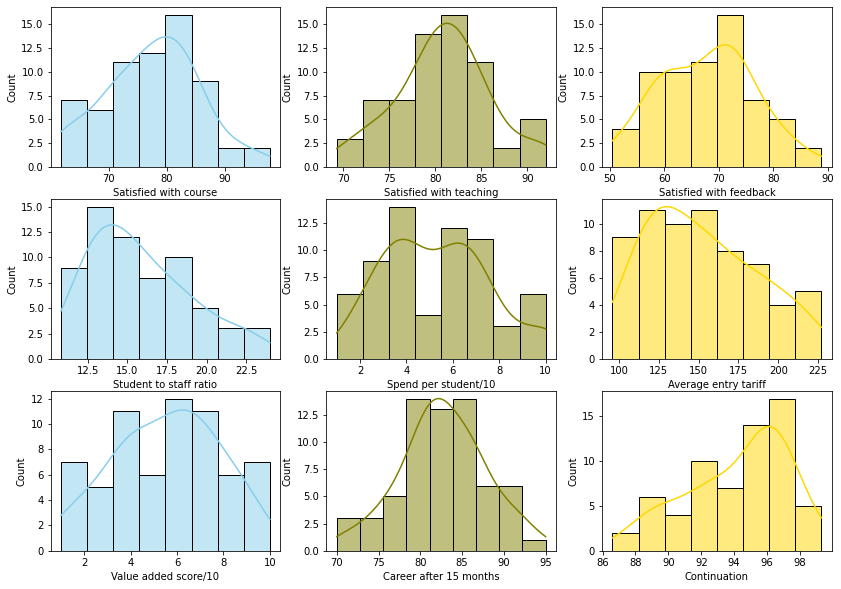

In [ ]:
# Data Spread after outliers are removed for main table 2021
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
sns.histplot(data=X_23M, x="Satisfied with course", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=X_23M, x="Satisfied with teaching", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X_23M, x="Satisfied with feedback", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=X_23M, x="Student to staff ratio", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=X_23M, x="Spend per student/10", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=X_23M, x="Average entry tariff", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=X_23M, x="Value added score/10", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=X_23M, x="Career after 15 months", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=X_23M, x="Continuation", kde=True, color="gold", ax=axs[2, 2])
plt.show()


In [ ]:
# Transform data
df = scaler.fit_transform(X_23M)
X_23M = pd.DataFrame(df, columns=names)

[17:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


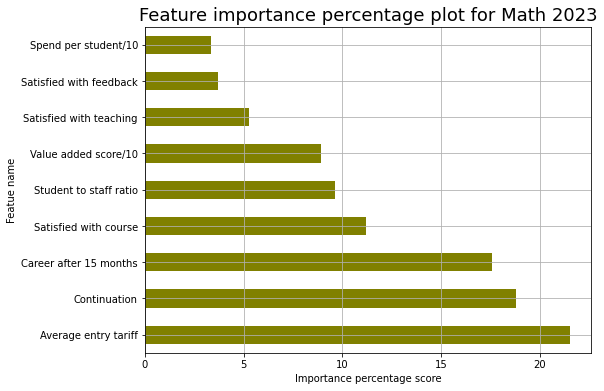

Satisfied with course      11.205780
Satisfied with teaching     5.281072
Satisfied with feedback     3.689025
Student to staff ratio      9.639027
Spend per student/10        3.357487
Average entry tariff       21.536690
Value added score/10        8.932449
Career after 15 months     17.574997
Continuation               18.783472
dtype: float32


In [ ]:
# Define the model
model23M = XGBRegressor()
# Fit the model
model23M.fit(X_23M.iloc[2:], y_23M.iloc[2:])
plt.figure(figsize=(8,6)) 

imprtancepercent_23=(model23M.feature_importances_ / sum(model23M.feature_importances_)) * 100
feat_importances_23 = pd.Series(imprtancepercent_23, index=X_23M.iloc[2:].columns)
feat_importances_23.nlargest(15).plot(kind='barh',color='olive')
plt.title("Feature importance percentage plot for Math 2023",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()
print(feat_importances_23)

## 2021 Math Table

In [ ]:
# Loading 2021 Math Table datset
missing_values = ["Unknown", "No reply", "NaN"]
df_2021M = pd.read_csv("2021_math_theguardian.csv", na_values = missing_values)
# Data Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit on the dataset
y_21M=df_2021M['Guardian score/100']
y_21M.index = np.arange(1, len(y_21M) + 1)
imputer.fit(df_2021M.drop('Guardian score/100', axis=1))
X_21M=imputer.transform(df_2021M.drop('Guardian score/100', axis=1))
X_21M = pd.DataFrame(imputer.transform(df_2021M.drop('Guardian score/100', axis=1)),columns=['Satisfied with course','Satisfied with teaching','Satisfied with feedback','Student to staff ratio','Spend per student/10','Average entry tariff','Value added score/10','Career after 15 months','Continuation'])
X_21M.index = np.arange(1, len(X_21M) + 1)
# Finding Outliers
print(find_outliers_IQR(X_21M))
# Imputing Outliers
X_21M['Satisfied with course'] = impute_outliers_IQR(X_21M['Satisfied with course'])
X_21M['Satisfied with teaching'] = impute_outliers_IQR(X_21M['Satisfied with teaching'])
X_21M['Satisfied with feedback'] = impute_outliers_IQR(X_21M['Satisfied with feedback'])
X_21M['Student to staff ratio'] = impute_outliers_IQR(X_21M['Student to staff ratio'])
X_21M['Spend per student/10'] = impute_outliers_IQR(X_21M['Spend per student/10'])
X_21M['Average entry tariff'] = impute_outliers_IQR(X_21M['Average entry tariff'])
X_21M['Value added score/10'] = impute_outliers_IQR(X_21M['Value added score/10'])
X_21M['Career after 15 months'] = impute_outliers_IQR(X_21M['Career after 15 months'])
X_21M['Continuation'] = impute_outliers_IQR(X_21M['Continuation'])

Satisfied with course      0
Satisfied with teaching    1
Satisfied with feedback    0
Student to staff ratio     3
Spend per student/10       0
Average entry tariff       0
Value added score/10       0
Career after 15 months     2
Continuation               0
dtype: int64


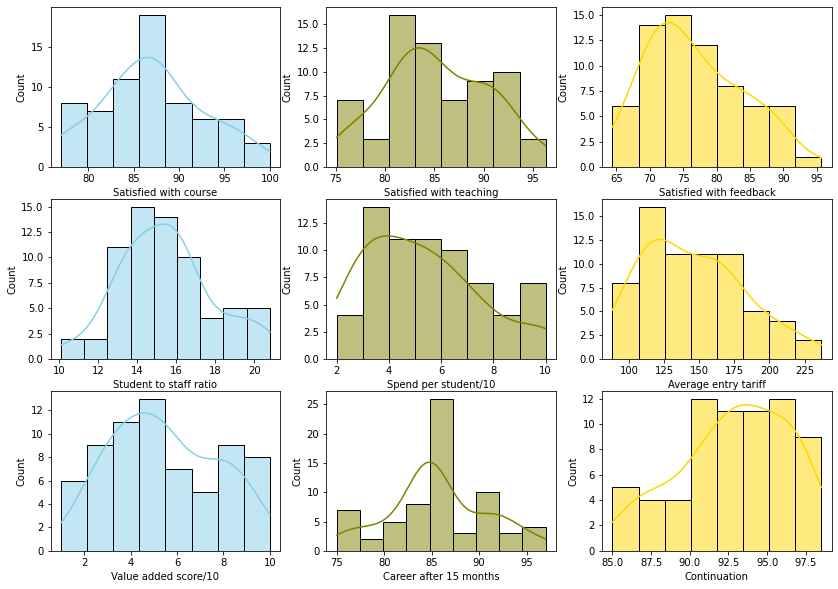

In [ ]:
# Data Spread after outliers are removed for Math table 2021
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
sns.histplot(data=X_21M, x="Satisfied with course", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=X_21M, x="Satisfied with teaching", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X_21M, x="Satisfied with feedback", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=X_21M, x="Student to staff ratio", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=X_21M, x="Spend per student/10", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=X_21M, x="Average entry tariff", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=X_21M, x="Value added score/10", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=X_21M, x="Career after 15 months", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=X_21M, x="Continuation", kde=True, color="gold", ax=axs[2, 2])
plt.show()


In [ ]:
# Transform data
df = scaler.fit_transform(X_21M)
X_21M = pd.DataFrame(df, columns=names)
X_21M.head()

,Satisfied with course,Satisfied with teaching,Satisfied with feedback,Student to staff ratio,Spend per student/10,Average entry tariff,Value added score/10,Career after 15 months,Continuation
0,0.000000,-0.044948,0.000000,-2.155487,2.152030,1.852978,0.237971,2.203919,1.360275
1,1.214403,1.533554,0.874591,0.220386,-0.120300,2.404291,0.679916,1.235961,1.130001
2,0.000000,-0.044948,0.000000,-0.113069,2.152030,2.514553,-1.087866,2.010328,1.619334
3,1.945477,0.885045,0.219282,-0.446525,-0.574766,-0.876020,2.005753,-0.100201,1.417844
4,0.518992,0.885045,0.916420,-1.071755,-0.120300,0.722787,0.679916,-0.119181,0.813374


[17:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


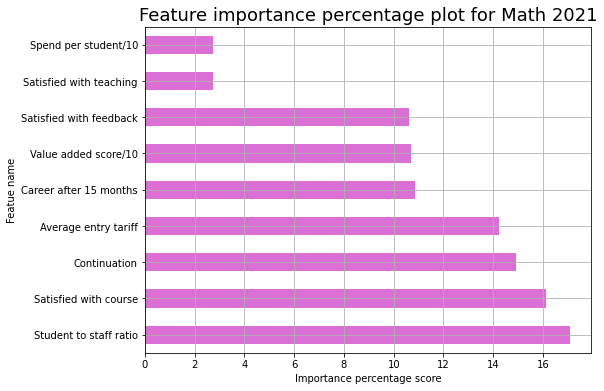

Satisfied with course      16.134371
Satisfied with teaching     2.728173
Satisfied with feedback    10.611775
Student to staff ratio     17.089596
Spend per student/10        2.727785
Average entry tariff       14.235727
Value added score/10       10.676777
Career after 15 months     10.872530
Continuation               14.923268
dtype: float32


In [ ]:
# Define the model
model21M = XGBRegressor()
# Fit the model
model21M.fit(X_21M.iloc[2:], y_21M.iloc[2:])
plt.figure(figsize=(8,6)) 
# Calculating feature importance with XGBRegressor()
imprtancepercent_21M=(model21M.feature_importances_ / sum(model21M.feature_importances_)) * 100
feat_importances_21M = pd.Series(imprtancepercent_21M, index=X_21M.iloc[2:].columns)
feat_importances_21M.nlargest(15).plot(kind='barh',color='orchid')
plt.title("Feature importance percentage plot for Math 2021",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()
feat_importances_name = pd.Series(model.feature_importances_, index=X_21M.iloc[2:].columns)
print(feat_importances_21M)

## **2022 The Guardian Math**

In [ ]:
# Loading 2022 Math Table datset
missing_values = ["Unknown", "No reply", "NaN"]
df_2022M = pd.read_csv("2022_math_theguardian.csv", na_values = missing_values)
#Checking columns which have null values
df_2022M.isnull().sum()

Guardian score/100          0
Satisfied with course       3
Satisfied with teaching     3
Satisfied with feedback     3
Student to staff ratio      3
Spend per student/10        0
Average entry tariff        0
Value added score/10        4
Career after 15 months     17
Continuation                0
dtype: int64

In [ ]:
# Data Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit on the dataset4
y_22M=df_2022M['Guardian score/100']
y_22M.index = np.arange(1, len(y_22M) + 1)
imputer.fit(df_2022M.drop('Guardian score/100', axis=1))
X_22M=imputer.transform(df_2022M.drop('Guardian score/100', axis=1))
X_22M = pd.DataFrame(imputer.transform(df_2022M.drop('Guardian score/100', axis=1)),columns=['Satisfied with course','Satisfied with teaching','Satisfied with feedback','Student to staff ratio','Spend per student/10','Average entry tariff','Value added score/10','Career after 15 months','Continuation'])
X_22M.index = np.arange(1, len(X_22M) + 1)
# Finding Outliers
print(find_outliers_IQR(X_22M))
# Imputing Outliers
X_22M['Satisfied with course'] = impute_outliers_IQR(X_22M['Satisfied with course'])
X_22M['Satisfied with teaching'] = impute_outliers_IQR(X_22M['Satisfied with teaching'])
X_22M['Satisfied with feedback'] = impute_outliers_IQR(X_22M['Satisfied with feedback'])
X_22M['Student to staff ratio'] = impute_outliers_IQR(X_22M['Student to staff ratio'])
X_22M['Spend per student/10'] = impute_outliers_IQR(X_22M['Spend per student/10'])
X_22M['Average entry tariff'] = impute_outliers_IQR(X_22M['Average entry tariff'])
X_22M['Value added score/10'] = impute_outliers_IQR(X_22M['Value added score/10'])
X_22M['Career after 15 months'] = impute_outliers_IQR(X_22M['Career after 15 months'])
X_22M['Continuation'] = impute_outliers_IQR(X_22M['Continuation'])

Satisfied with course      5
Satisfied with teaching    4
Satisfied with feedback    0
Student to staff ratio     3
Spend per student/10       0
Average entry tariff       0
Value added score/10       0
Career after 15 months     2
Continuation               0
dtype: int64


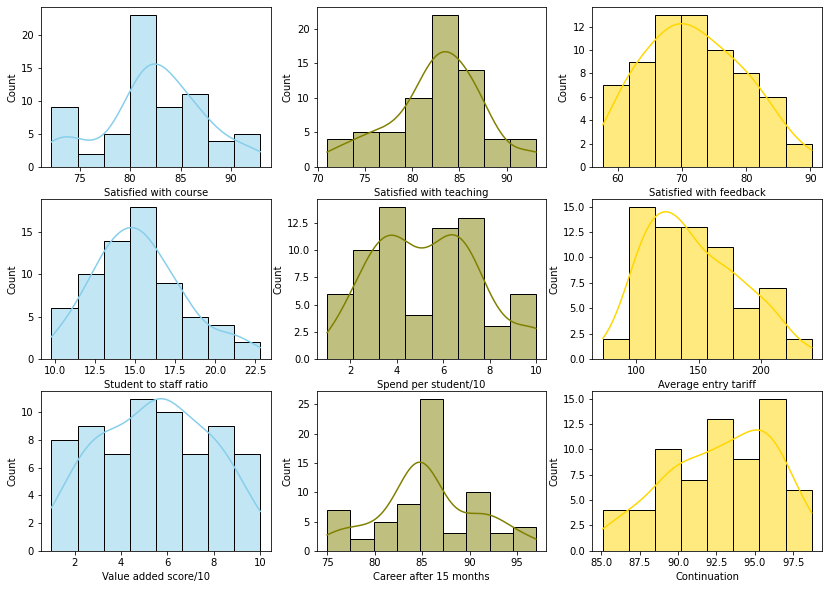

In [ ]:
# Data Spread after outliers are removed for Math table 2022
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
sns.histplot(data=X_22M, x="Satisfied with course", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=X_22M, x="Satisfied with teaching", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X_22M, x="Satisfied with feedback", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=X_22M, x="Student to staff ratio", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=X_22M, x="Spend per student/10", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=X_22M, x="Average entry tariff", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=X_22M, x="Value added score/10", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=X_22M, x="Career after 15 months", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=X_22M, x="Continuation", kde=True, color="gold", ax=axs[2, 2])
plt.show()

In [ ]:
# Transform data
df = scaler.fit_transform(X_22M)
X_22M = pd.DataFrame(df, columns=names)
X_22M.head()

,Satisfied with course,Satisfied with teaching,Satisfied with feedback,Student to staff ratio,Spend per student/10,Average entry tariff,Value added score/10,Career after 15 months,Continuation
0,0.022199,-0.029584,0.000000,-1.691922,2.087198,1.697052,0.229636,2.203919,1.674478
1,0.022199,2.142694,1.578129,0.079278,0.296290,2.589317,-0.202620,1.235961,1.528047
2,0.582806,1.058286,-0.026697,-1.258159,2.087198,1.588899,-0.634876,1.429553,0.620177
3,0.022199,-0.029584,0.000000,0.115425,2.087198,2.048551,-1.499388,2.010328,1.733050
4,-0.205401,0.587694,-1.070486,-0.607514,2.087198,1.751129,1.094148,0.655186,0.795894


[17:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


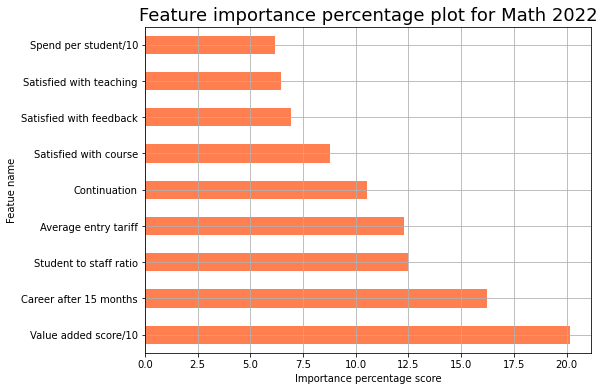

Satisfied with course       8.777317
Satisfied with teaching     6.466145
Satisfied with feedback     6.920388
Student to staff ratio     12.486133
Spend per student/10        6.150068
Average entry tariff       12.265816
Value added score/10       20.168776
Career after 15 months     16.220825
Continuation               10.544535
dtype: float32


In [ ]:
# Define the model
model22M = XGBRegressor()
# Fit the model
model22M.fit(X_22M.iloc[2:], y_22M.iloc[2:])
plt.figure(figsize=(8,6)) 
# Calculating feature importance with XGBRegressor()
imprtancepercent_22M=(model22M.feature_importances_ / sum(model22M.feature_importances_)) * 100
feat_importances_22M = pd.Series(imprtancepercent_22M, index=X_22M.iloc[2:].columns)
feat_importances_22M.nlargest(15).plot(kind='barh',color='coral')
plt.title("Feature importance percentage plot for Math 2022",fontsize=18)
plt.xlabel("Importance percentage score")
plt.ylabel("Featue name")
plt.grid()
plt.show()
print(feat_importances_22M)

### **Predicting Aston University ranking by modifying Important features**
#### **25th index in table is Aston**

I have made changes to 4 columns which are most important and importance score is greater than 10% -
* Conitunation 96 98
* Career after 15 months 83 85
* Average entry tariff 126 130
* Student to staff ratio 15.8 13.1

In [ ]:
#Loading modified important features Dataset in python
missing_values = ["Unknown", "No reply", "NaN"]
df = pd.read_csv("Elevate2022_Guardian_Table.csv", na_values = missing_values)
df.index = np.arange(1, len(df) + 1)

In [ ]:
#Checking columns which have null values
df.isnull().sum()

Guardian score/100         0
Satisfied with course      2
Satisfied with teaching    2
Satisfied with feedback    2
Student to staff ratio     0
Spend per student/10       2
Average entry tariff       0
Value added score/10       0
Career after 15 months     0
Continuation               1
dtype: int64

In [ ]:
#Data Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit on the dataset
y_22T=df['Guardian score/100']
y_22T.index = np.arange(1, len(y_22T) + 1)
imputer.fit(df.drop('Guardian score/100', axis=1))
X_22T=imputer.transform(df.drop('Guardian score/100', axis=1))
X_22T = pd.DataFrame(imputer.transform(df.drop('Guardian score/100', axis=1)),columns=['Satisfied with course','Satisfied with teaching','Satisfied with feedback','Student to staff ratio','Spend per student/10','Average entry tariff','Value added score/10','Career after 15 months','Continuation'])
X_22T.index = np.arange(1, len(X_22T) + 1)

In [ ]:
# Finding outliers
print(find_outliers_IQR(X_22T))
# Imputing outliers
X_22T['Satisfied with course'] = impute_outliers_IQR(X_22T['Satisfied with course'])
X_22T['Satisfied with teaching'] = impute_outliers_IQR(X_22T['Satisfied with teaching'])
X_22T['Satisfied with feedback'] = impute_outliers_IQR(X_22T['Satisfied with feedback'])
X_22T['Student to staff ratio'] = impute_outliers_IQR(X_22T['Student to staff ratio'])
X_22T['Spend per student/10'] = impute_outliers_IQR(X_22T['Spend per student/10'])
X_22T['Average entry tariff'] = impute_outliers_IQR(X_22T['Average entry tariff'])
X_22T['Value added score/10'] = impute_outliers_IQR(X_22T['Value added score/10'])

Satisfied with course      3
Satisfied with teaching    4
Satisfied with feedback    1
Student to staff ratio     2
Spend per student/10       2
Average entry tariff       3
Value added score/10       1
Career after 15 months     0
Continuation               0
dtype: int64


In [ ]:
# Splitting the dataset into 80:20 ration for model training and testing
X_train,X_test, y_train, y_test = train_test_split(X_22T.iloc[2:], y_22T.iloc[2:], test_size = 0.2, random_state=0)

In [ ]:
#Defining machine learning models
model1 = DecisionTreeRegressor()
model2 = RandomForestRegressor()
model3 = XGBRegressor()

In [ ]:
# Fitting machine learnning models
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
# Predicting y_pred values with fitted models
y_pred_M1T = model1.predict(X_test)
y_pred_M2T = model2.predict(X_test)
y_pred_M3T = model3.predict(X_test)
index=X_test.index

[17:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Calculating OLS model regression results
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train,X2)
est2 = est.fit()
print(est2.summary())
X2 = sm.add_constant(X_test)
# Predicting y_pred values with fitted OLS model
y_pred_M4T = est2.predict(X2) 
y_predkey=[]
for key in y_pred_M4T.index:
    y_predkey.append(key)

                            OLS Regression Results                            
Dep. Variable:     Guardian score/100   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     79.31
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           1.56e-37
Time:                        17:27:31   Log-Likelihood:                -228.74
No. Observations:                  95   AIC:                             477.5
Df Residuals:                      85   BIC:                             503.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [ ]:
# Calculating r2 score metric for all models
print("DecisionTreeRegressor r2 score is",r2_score(y_test,y_pred_M1T))
print("RandomForestRegressor r2 score is",r2_score(y_test,y_pred_M2T))
print("XGBRegressor r2 score is",r2_score(y_test,y_pred_M3T))

DecisionTreeRegressor r2 score is 0.6271121681299524
RandomForestRegressor r2 score is 0.693927952927438
XGBRegressor r2 score is 0.6902029573419023


In [ ]:
# Calculating Adjusted-R2 score for all models except OLS because its adjusted-R2 was given in its summary above which is - 0.882
N=X_test.shape[0]
p=9
x1 = (1-r2_score(y_test,y_pred_M1T))
y1 = (N-1) / (N-p-1)
adj_rsquared1 = (1 - (x1 * y1))
print("Adjusted-R2 DecisionTreeRegressor : " , adj_rsquared1)
x2 = (1-r2_score(y_test,y_pred_M2T))
adj_rsquared2 = (1 - (x2 * y1))
print("Adjusted-R2 RandomForestRegressor : " , adj_rsquared2)
x3 = (1-r2_score(y_test,y_pred_M3T))
adj_rsquared3 = (1 - (x3 * y1))
print("Adjusted-R2 XGBRegressor : " , adj_rsquared2)

Adjusted-R2 DecisionTreeRegressor :  0.387398561927779
Adjusted-R2 RandomForestRegressor :  0.4971673512379339
Adjusted-R2 XGBRegressor :  0.4971673512379339


In [ ]:
# Calculating mean square error metric for all models
print("DecisionTreeRegressor mse is",mean_squared_error(y_test,y_pred_M1T))
print("RandomForestRegressor mse is",mean_squared_error(y_test,y_pred_M2T))
print("XGBRegressor mse is",mean_squared_error(y_test,y_pred_M3T))
print("OLS regression mse is",mean_squared_error(y_test,y_pred_M4T))

DecisionTreeRegressor mse is 39.00375
RandomForestRegressor mse is 32.01487574999994
XGBRegressor mse is 32.40450711941392
OLS regression mse is 29.022193837899326


In [ ]:
# Calculating root mean square error metric for all models
print("sqrt DecisionTreeRegressor mse is",math.sqrt(mean_squared_error(y_test,y_pred_M1T)))
print("sqrt RandomForestRegressor mse is",math.sqrt(mean_squared_error(y_test,y_pred_M2T)))
print("sqrt XGBRegressor mse is",math.sqrt(mean_squared_error(y_test,y_pred_M3T)))
print("sqrt OLS regression mse is",math.sqrt(mean_squared_error(y_test,y_pred_M4T)))

sqrt DecisionTreeRegressor mse is 6.245298231469815
sqrt RandomForestRegressor mse is 5.6581689396835735
sqrt XGBRegressor mse is 5.6924956846197015
sqrt OLS regression mse is 5.387225059146807


In [ ]:
# alculating mean absolute error metric for all models
print("MAE DecisionTreeRegressor mse is",mae(y_test,y_pred_M1T))
print("MAE RandomForestRegressor mse is",mae(y_test,y_pred_M2T))
print("MAE XGBRegressor mse is",mae(y_test,y_pred_M3T))
print("MAE OLS regression mse is",mae(y_test,y_pred_M4T))

MAE DecisionTreeRegressor mse is 4.645833333333332
MAE RandomForestRegressor mse is 3.7606666666666677
MAE XGBRegressor mse is 3.8537641843159993
MAE OLS regression mse is 3.0982705874133454


In [ ]:
# Defining a new dataframe with predicted university ranking after modifying important features
df = pd.DataFrame(list(zip(index, y_pred_M4T)),
               columns =['index', 'Prediction'])
df

,index,Prediction
0,51,69.228615
1,97,62.026482
2,98,59.824362
3,11,72.247294
4,100,62.740527
5,25,76.288220
6,10,79.185751
7,13,77.758196
8,48,69.929544
9,92,62.924422


In [ ]:
# Getting Dataset which has university name corresponding to its index
df_uniname=pd.read_csv("Uni_name.csv")
df_uniname

,index,Uni_Name
0,1,Oxford
1,2,Cambridge
2,3,St Andrews
3,4,London School of Economics
4,5,Durham
...,...,...
116,117,Leeds Trinity
117,118,De Montfort
118,119,Canterbury Christ Church
119,120,West of Scotland


In [ ]:
# Merging df and df_uniname to see data in onedataframe with university and its prediction score (Here we need to look at Aston's Prediction)
df_merge=pd.merge(df,df_uniname,how='inner',left_on='index',right_on='index')
df_merge.to_csv("df_merge.csv", sep=',', na_rep='',encoding='utf-8',index=False)
df_merge

,index,Prediction,Uni_Name
0,51,69.228615,Queen Mary
1,97,62.026482,Anglia Ruskin
2,98,59.824362,Liverpool Hope
3,11,72.247294,Glasgow
4,100,62.740527,Central Lancashire
5,25,76.288220,Aston
6,10,79.185751,Loughborough
7,13,77.758196,Lancaster
8,48,69.929544,Keele
9,92,62.924422,Worcester


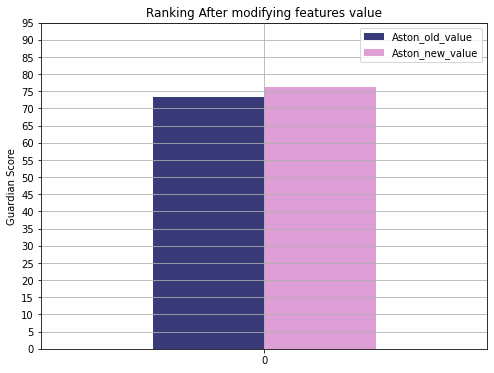

In [ ]:
# Creating a chart to display result of Aston's old value versus new value
Aston_old_value=73.3
df_newvalue=df.loc[df['index'] == 25]
Aston_new_value=float(df_newvalue['Prediction'].to_string(index=False))
Aston_new_value
Aston_old_value1=[]
Aston_old_value1.append(Aston_old_value)
Aston_new_value1=[]
Aston_new_value1.append(Aston_new_value)
df_value = pd.DataFrame({'Aston_old_value': Aston_old_value1,
                   'Aston_new_value': Aston_new_value1})
x=list(range(0,100,5))
ax = df_value.plot.bar(rot=0, figsize=(8,6),title='Ranking After modifying features value', grid='true',yticks=x,
                       ylabel='Guardian Score', colormap='tab20b',legend='true')


In [ ]:
# Displaying Aston's old versus new value
df_value

,Aston_old_value,Aston_new_value
0,73.3,76.28822


### 2022 Main Table Visualization

In [ ]:
# Loading Datset
missing_values = ["Unknown", "No reply", "NaN"]
df_2022F = pd.read_csv("2022_The_guardian_full_data.csv", na_values = missing_values)
# Data Imputation with mean
mean = df_2022F['Guardian score/100'].mean()
df_2022F['Guardian score/100'].fillna(mean, inplace=True)
mean = df_2022F['Satisfied with course'].mean()
df_2022F['Satisfied with course'].fillna(mean, inplace=True)
mean = df_2022F['Satisfied with teaching'].mean()
df_2022F['Satisfied with teaching'].fillna(mean, inplace=True)
mean = df_2022F['Satisfied with feedback'].mean()
df_2022F['Satisfied with feedback'].fillna(mean, inplace=True)
mean = df_2022F['Student to staff ratio'].mean()
df_2022F['Student to staff ratio'].fillna(mean, inplace=True)
mean = df_2022F['Spend per student/10'].mean()
df_2022F['Spend per student/10'].fillna(mean, inplace=True)
mean = df_2022F['Average entry tariff'].mean()
df_2022F['Average entry tariff'].fillna(mean, inplace=True)
mean = df_2022F['Value added score/10'].mean()
df_2022F['Value added score/10'].fillna(mean, inplace=True)
mean = df_2022F['Career after 15 months'].mean()
df_2022F['Career after 15 months'].fillna(mean, inplace=True)
mean = df_2022F['Continuation'].mean()
df_2022F['Continuation'].fillna(mean, inplace=True)
df_2022F.index = np.arange(1, len(df_2022F) + 1)
# Display Data after imputation
df_2022F.head(5)

,2022,Institution,Guardian score/100,Satisfied with course,Satisfied with teaching,Satisfied with feedback,Student to staff ratio,Spend per student/10,Average entry tariff,Value added score/10,Career after 15 months,Continuation
1,3,St Andrews,96.8,93.1,92.3,79.6,11.1,7.3,207,5.6,84,97
2,4,London School of Economics,91.6,80.1,83.1,70.2,12.4,8.7,175,6.9,93,97
3,5,Durham,86.5,83.9,84.8,69.5,13.5,6.5,182,6.7,89,97
4,6,Warwick,85.3,84.6,85.1,70.7,12.8,7.0,170,5.3,88,97
5,7,Imperial College,84.9,83.0,85.0,62.2,11.1,9.2,197,5.1,96,96


In [ ]:
# Finding Outliers
print(find_outliers_IQR(df_2022F))
# Imputing Outliers
df_2022F['Satisfied with course'] = impute_outliers_IQR(df_2022F['Satisfied with course'])
df_2022F['Satisfied with teaching'] = impute_outliers_IQR(df_2022F['Satisfied with teaching'])
df_2022F['Satisfied with feedback'] = impute_outliers_IQR(df_2022F['Satisfied with feedback'])
df_2022F['Student to staff ratio'] = impute_outliers_IQR(df_2022F['Student to staff ratio'])
df_2022F['Spend per student/10'] = impute_outliers_IQR(df_2022F['Spend per student/10'])
df_2022F['Average entry tariff'] = impute_outliers_IQR(df_2022F['Average entry tariff'])
df_2022F['Value added score/10'] = impute_outliers_IQR(df_2022F['Value added score/10'])
df_2022F['Career after 15 months'] = impute_outliers_IQR(df_2022F['Career after 15 months'])
df_2022F['Continuation'] = impute_outliers_IQR(df_2022F['Continuation'])

2022                       0
Institution                0
Guardian score/100         3
Satisfied with course      3
Satisfied with teaching    4
Satisfied with feedback    0
Student to staff ratio     2
Spend per student/10       0
Average entry tariff       4
Value added score/10       1
Career after 15 months     0
Continuation               1
dtype: int64


In [ ]:
df_scalerfit=df_2022F.iloc[:,3:]
df_scalerfit

,Satisfied with course,Satisfied with teaching,Satisfied with feedback,Student to staff ratio,Spend per student/10,Average entry tariff,Value added score/10,Career after 15 months,Continuation
1,78.468067,81.605882,79.6,11.100000,7.3,131.605042,5.6,84.0,97.000000
2,80.100000,83.100000,70.2,12.400000,8.7,175.000000,6.9,93.0,97.000000
3,83.900000,84.800000,69.5,13.500000,6.5,182.000000,6.7,89.0,97.000000
4,84.600000,85.100000,70.7,12.800000,7.0,170.000000,5.3,88.0,97.000000
5,83.000000,85.000000,62.2,11.100000,9.2,131.605042,5.1,96.0,96.000000
...,...,...,...,...,...,...,...,...,...
115,72.700000,78.000000,69.8,16.164706,4.3,103.000000,7.7,71.0,87.000000
116,71.600000,81.605882,65.1,20.200000,3.1,105.000000,5.5,76.0,89.000000
117,71.100000,80.400000,70.8,16.400000,3.3,96.000000,3.6,75.0,87.000000
118,79.200000,81.800000,70.1,20.900000,3.3,136.000000,6.4,74.0,86.000000


In [ ]:
# Transform data
df = scaler.fit_transform(df_scalerfit)
df_new = pd.DataFrame(df, columns=names)

In [ ]:
# Concatenate two dataframes together
df_2022F = pd.concat([df_2022F.iloc[:,0:3], df_new], axis=1)
df_2022F

,2022,Institution,Guardian score/100,Satisfied with course,Satisfied with teaching,Satisfied with feedback,Student to staff ratio,Spend per student/10,Average entry tariff,Value added score/10,Career after 15 months,Continuation
0,NaN,NaN,NaN,-0.028094,-0.044893,1.992743,-2.009173,1.223432,0.108359,0.101823,0.922835,1.638309
1,3.0,St Andrews,96.8,0.372942,0.512367,0.072279,-1.478611,2.058424,2.117001,1.328901,2.247709,1.638309
2,4.0,London School of Economics,91.6,1.306763,1.146414,-0.070734,-1.029673,0.746294,2.441014,1.140119,1.658876,1.638309
3,5.0,Durham,86.5,1.478783,1.258305,0.174432,-1.315361,1.044505,1.885564,-0.181349,1.511668,1.638309
4,6.0,Warwick,85.3,1.085595,1.221008,-1.562158,-2.009173,2.356636,0.108359,-0.370130,2.689334,1.328549
...,...,...,...,...,...,...,...,...,...,...,...,...
115,117.0,Leeds Trinity,53.2,-1.715870,-0.044893,-0.969674,1.704764,-1.281545,-1.123120,0.007432,-0.254831,-0.839771
116,118.0,De Montfort,52.5,-1.838741,-0.494649,0.194862,0.153889,-1.162260,-1.539708,-1.785990,-0.402039,-1.459291
117,119.0,Canterbury Christ Church,52.2,0.151773,0.027507,0.051849,1.990451,-1.162260,0.311791,0.856948,-0.549248,-1.769051
118,120.0,West of Scotland,51.1,-1.937038,-0.904915,-0.295469,0.057860,-0.625480,-1.169408,-2.541114,-0.549248,-0.030230


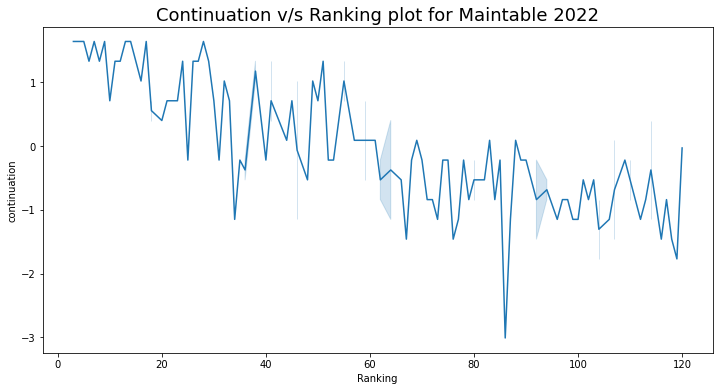

In [ ]:
# Continuation v/s Ranking plot for Maintable 2022
plt.figure(figsize=(12,6)) 
plt.title("Continuation v/s Ranking plot for Maintable 2022",fontsize=18)
plt.xlabel("Ranking")
plt.ylabel("continuation")
sns.lineplot(data=df_2022F, x="2022", y="Continuation")

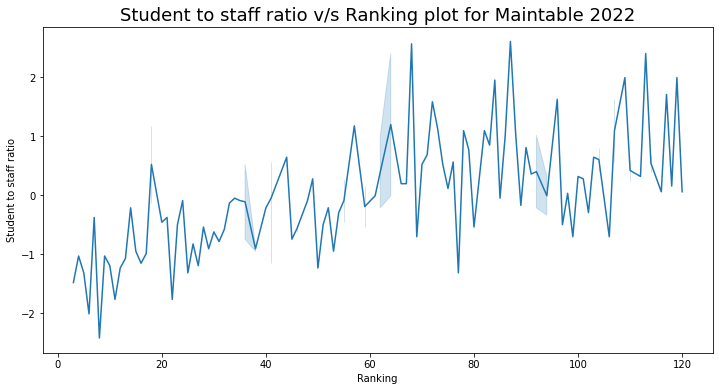

In [ ]:
# Student to staff ratio v/s Ranking plot for Maintable 2022
plt.figure(figsize=(12,6)) 
plt.title("Student to staff ratio v/s Ranking plot for Maintable 2022",fontsize=18)
plt.xlabel("Ranking")
plt.ylabel("Student to staff ratio")
sns.lineplot(data = df_2022F, x = "2022", y = "Student to staff ratio")

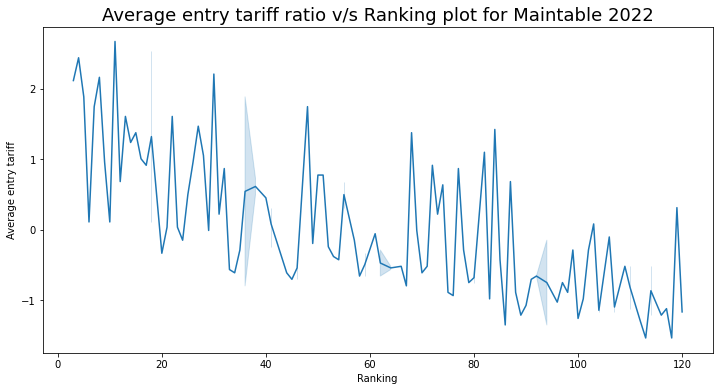

In [ ]:
# Average entry tariff ratio v/s Ranking plot for Maintable 2022
plt.figure(figsize=(12,6)) 
plt.title("Average entry tariff ratio v/s Ranking plot for Maintable 2022",fontsize=18)
plt.xlabel("Ranking")
plt.ylabel("Average entry tariff")
sns.lineplot(data = df_2022F, x = "2022", y = "Average entry tariff")

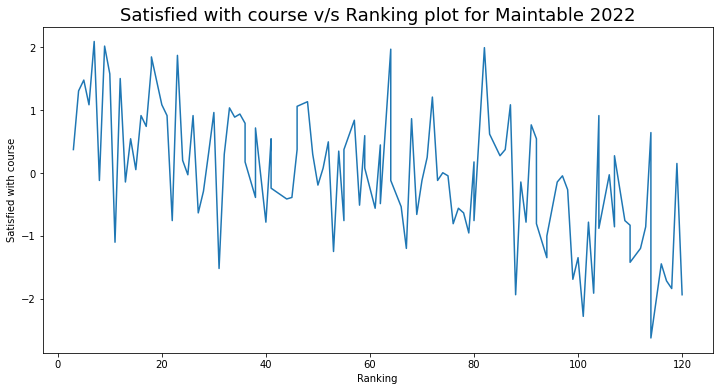

In [ ]:
# Satisfied with course v/s Ranking plot for Maintable 2022
plt.figure(figsize=(12,6)) 
plt.title("Satisfied with course v/s Ranking plot for Maintable 2022",fontsize=18)
plt.xlabel("Ranking")
plt.ylabel("Satisfied with course")
plt.plot(df_2022F['2022'],df_2022F['Satisfied with course'])

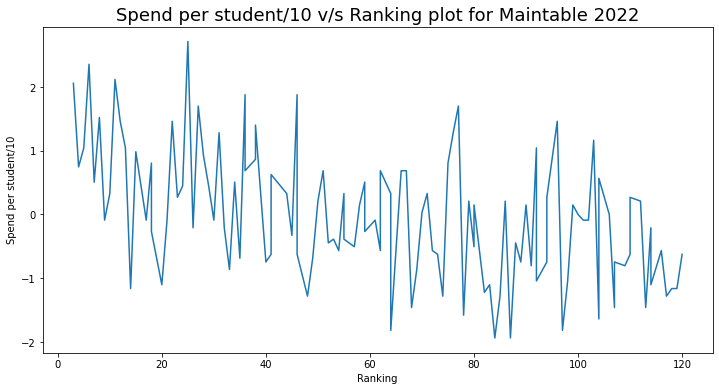

In [ ]:
# Spend per student/10 v/s Ranking plot for Maintable 2022
plt.figure(figsize=(12,6)) 
plt.title("Spend per student/10 v/s Ranking plot for Maintable 2022",fontsize=18)
plt.xlabel("Ranking")
plt.ylabel("Spend per student/10")
plt.plot(df_2022F['2022'],df_2022F['Spend per student/10'])

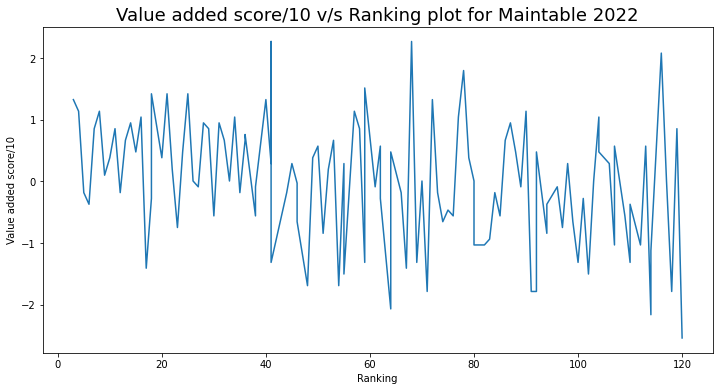

In [ ]:
# Value added score/10 v/s Ranking plot for Maintable 2022
plt.figure(figsize=(12,6)) 
plt.title("Value added score/10 v/s Ranking plot for Maintable 2022",fontsize=18)
plt.xlabel("Ranking")
plt.ylabel("Value added score/10")
plt.plot(df_2022F['2022'],df_2022F['Value added score/10'])

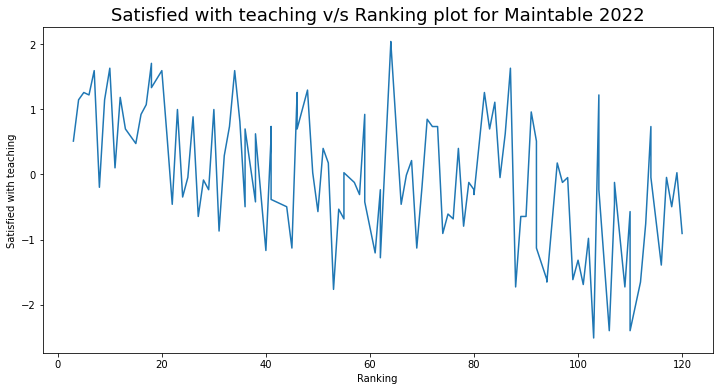

In [ ]:
# Satisfied with teaching v/s Ranking plot for Maintable 2022
plt.figure(figsize=(12,6)) 
plt.title("Satisfied with teaching v/s Ranking plot for Maintable 2022",fontsize=18)
plt.xlabel("Ranking")
plt.ylabel("Satisfied with teaching")
plt.plot(df_2022F['2022'],df_2022F['Satisfied with teaching'])

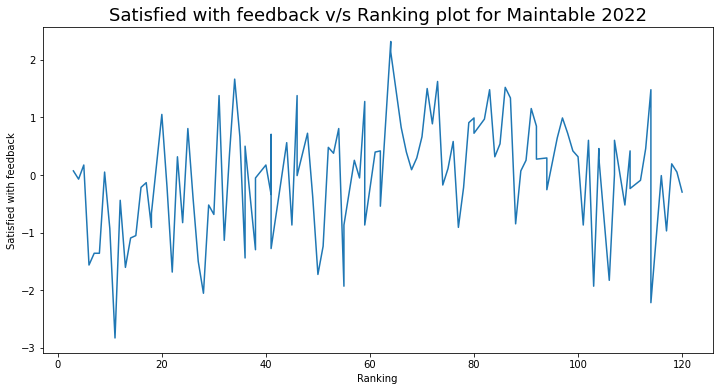

In [ ]:
# Satisfied with feedback v/s Ranking plot for Maintable 2022
plt.figure(figsize=(12,6)) 
plt.title("Satisfied with feedback v/s Ranking plot for Maintable 2022",fontsize=18)
plt.xlabel("Ranking")
plt.ylabel("Satisfied with feedback")
plt.plot(df_2022F['2022'],df_2022F['Satisfied with feedback'])

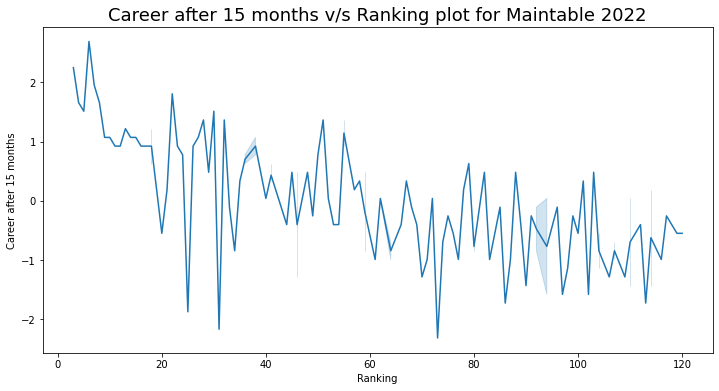

In [ ]:
# Career after 15 months v/s Ranking plot for Maintable 2022
plt.figure(figsize=(12,6)) 
plt.title("Career after 15 months v/s Ranking plot for Maintable 2022",fontsize=18)
plt.xlabel("Ranking")
plt.ylabel("Career after 15 months")
# plt.grid()

sns.lineplot(df_2022F['2022'],df_2022F['Career after 15 months'])
# plt.plot(df_2022F['2022'],df_2022F['Career after 15 months'])

In [ ]:
# Prinitng correlation values
print("Satisfied with course",df_2022F['2022'].corr(df_2022F['Satisfied with course']))
print("Satisfied with teaching",df_2022F['2022'].corr(df_2022F['Satisfied with teaching']))
print("Satisfied with feedback",df_2022F['2022'].corr(df_2022F['Satisfied with feedback']))
print("Student to staff ratio",df_2022F['2022'].corr(df_2022F['Student to staff ratio']))
print("Spend per student/10",df_2022F['2022'].corr(df_2022F['Spend per student/10']))
print("Average entry tariff",df_2022F['2022'].corr(df_2022F['Average entry tariff']))
print("Value added score/10",df_2022F['2022'].corr(df_2022F['Value added score/10']))
print("Career after 15 months",df_2022F['2022'].corr(df_2022F['Career after 15 months']))
print("Continuation",df_2022F['2022'].corr(df_2022F['Continuation']))

Satisfied with course -0.5577082566761755
Satisfied with teaching -0.4918267098474272
Satisfied with feedback 0.2783846649925316
Student to staff ratio 0.6088069099285991
Spend per student/10 -0.4777844745225757
Average entry tariff -0.6868262462876342
Value added score/10 -0.3217351451112893
Career after 15 months -0.660015456870571
Continuation -0.7616891567339229


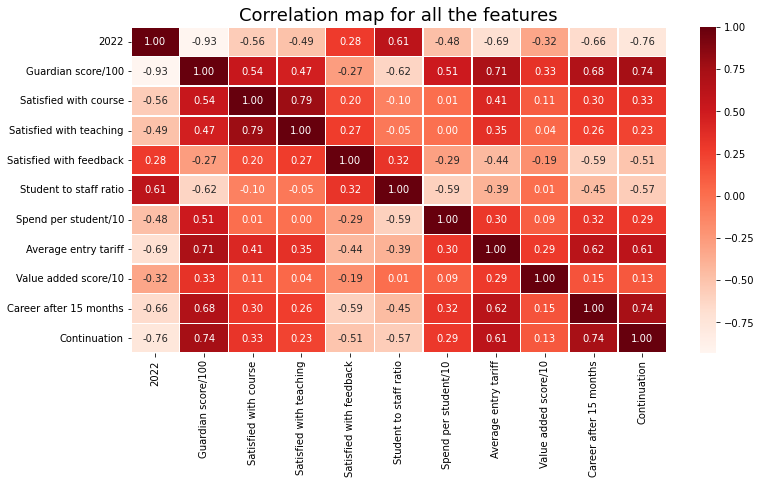

In [ ]:
# Heatmap for all features
plt.figure(figsize=(12,6)) 
plt.title("Correlation map for all the features",fontsize=18)
sns.heatmap(df_2022F.corr(), linewidths=0.5, cmap="Reds", annot=True,fmt=".2f")
plt.show()